In [165]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()



#from pysde import *
from functools import partial
from math import log
from matplotlib.colors import LogNorm
from scipy.integrate import odeint
from scipy.stats import entropy


import seaborn as sns
sns.set()

In [21]:
R_t, gamma, R = sym.symbols('R_t gamma R')
2*R*gamma**2

In [19]:
sym.Derivative(32*gamma**2).doit()

In [44]:
gamma, r_R, h, l_R, eta, h, R_0 = sym.symbols('gamma r_R h l_R eta h R_0')
R_exp = (gamma*r_R*h/l_R - eta*h + 1)*R_0

In [133]:
gamma = 0.0138172

eta0 = 6.205e-6
phi0 = 6.205e-6

r_R = 1e1
r_P = 1e1
l_R = 5000
l_P = 975

T = 10000

R_t = []
P_t = []

h = 0.01

R_0, P_0 = 5773,2.11e6

In [145]:
def trajectory(T=100000):
    R_t = np.zeros(T)
    P_t = np.zeros(T)
    
    R_0, P_0 = 5773,2.11e6

    for t in range(T):
        eta = np.random.normal(eta0, 1e-3)
        phi = np.random.normal(phi0, 1e-3)

        R = (gamma*r_R*h/l_R - eta*h + 1)*R_0
        P = ((1-gamma)*r_P*h/l_P)*R_0 + (1-phi*h)*P_0

        R_t[t] = R
        P_t[t] = P

        R_0 = R
        P_0 = P
    
    return {'Ribosomes': R_t,
            'Proteins' : P_t}



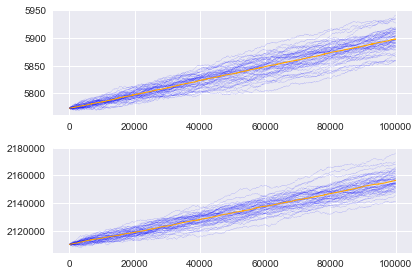

In [188]:
iterations = 100000
n_traj = 50


traj = [trajectory(iterations) for x in range(n_traj)]



avg_ribo = np.vstack([traj[x]['Ribosomes'] for x in range(n_traj)]).mean(0)
avg_prot = np.vstack([traj[x]['Proteins'] for x in range(n_traj)]).mean(0)

ribo_t = [traj[x]['Ribosomes'][n_traj//2] for x in range(n_traj)]
prot_t = [traj[x]['Proteins'][n_traj//2] for x in range(n_traj)]


fig, axes = plt.subplots(2)

for x in range(n_traj):
    axes[0].plot(traj[x]['Ribosomes'], linewidth=0.1, c='b', alpha=0.3)
    axes[1].plot(traj[x]['Proteins'], linewidth=0.1, c='b', alpha=0.3)
    
axes[0].plot(avg_ribo, linewidth=1, c='orange')
axes[1].plot(avg_prot, linewidth=1, c='orange')
    
#plt.yscale('log')
plt.tight_layout()
plt.show()

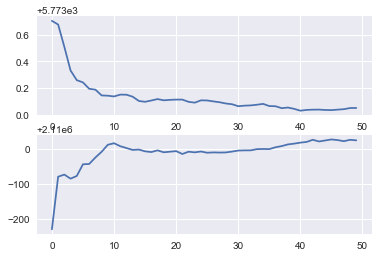

In [190]:
fig, axes = plt.subplots(2)

axes[0].plot(np.cumsum(ribo_t)/np.arange(1,n_traj+1))
axes[1].plot(np.cumsum(prot_t)/np.arange(1,n_traj+1))
plt.show()

array([5772.98270889, 5772.97276461, 5772.95226571, ..., 5891.27086104,
       5891.28846967, 5891.27723163])

In [ ]:
|